<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Utility" data-toc-modified-id="Utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Utility</a></span></li><li><span><a href="#Menu-Distributions" data-toc-modified-id="Menu-Distributions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Menu Distributions</a></span></li><li><span><a href="#Image-Distribution" data-toc-modified-id="Image-Distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Image Distribution</a></span></li></ul></li><li><span><a href="#Model-Selection:-classification" data-toc-modified-id="Model-Selection:-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Selection: classification</a></span></li><li><span><a href="#Over-sampling:-SMOTE" data-toc-modified-id="Over-sampling:-SMOTE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Over-sampling: SMOTE</a></span></li></ul></div>

# Setup

In [439]:
from IPython.display import HTML

HTML("<style>.container { width:80% !important; }</style>")

In [440]:
import os
import pickle
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [441]:
# replace the dir if needed

ROOT_DIR = "/home/hui/Projects/g5/datasets"  # Henry's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/"    #Lejia's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset/" #Nan's dir
# ROOT_DIR = "/content/drive/MyDrive/Project - G5/Dataset"


# path for image augmentation
RESIZE_DIR = ROOT_DIR + "/augmentation/resize"


# path for the different handcraft features
RAW_PIXEL_DIR = ROOT_DIR + "/handcraft_features/raw_pixel"
SIFT_DIR = ROOT_DIR + "/handcraft_features/sift"
HOG_DIR = ROOT_DIR + "/handcraft_features/hog"
LBP_DIR = ROOT_DIR + "/handcraft_features/lbp"


# menu datasets
MENU_FOOD = ROOT_DIR + "/MeetFresh_menu_food_2.csv"
MENU_DRINK = ROOT_DIR + "/MeetFresh_menu_drink_2.csv"

In [442]:
df_menu_food = pd.read_csv(MENU_FOOD, skiprows=1)
df_menu_drink = pd.read_csv(MENU_DRINK, skiprows=1)

In [443]:
print("Food menu sample size: {}".format(len(df_menu_food.index)))
print("Drink menu sample size: {}".format(len(df_menu_drink.index)))

Food menu sample size: 60
Drink menu sample size: 47


In [444]:
df_menu_food.sample(10)

,Item ID,Menu Category,Item Name (CHN),Item Name (ENG),Hot,Cold,Size,Kcal,Egg Allergen,Peanut Allergen,...,Strawberry,Mango,Egg Waffle,Matcha Egg Waffle,Chocolate Egg Waffle,Chocolate Chips,Matcha Red Bean,Mixed Nuts,Chocolate Wafer Rolls,Chocolate Syrup
24,D7,Shaved Ice,黑糖珍珠奶茶冰（中）,Blask Sugar Boba Milky Shaved Ice,0.0,1.0,M,1850,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,E4,Tofu Pudding,珍珠豆花（热）,Boba Tofu Pudding,1.0,0.0,NaN,510,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,D13,Shaved Ice,芒果牛奶冰（中）,Mango Milk Shaved Ice,0.0,1.0,M,337,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,E13,Tofu Pudding,芋头豆花（冷）,Taro Tofu Pudding,0.0,1.0,NaN,312,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,E8,Tofu Pudding,汤圆豆花（热）,Rice Ball Tofu Pudding,1.0,0.0,NaN,446,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,G1,Small Bites,裹糖爆米花（冲绳黑糖）,Brown Sugar Coated Popcorn,NaN,NaN,NaN,320,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,D16,Shaved Ice,双子星牛奶冰（大）,Mangoberry Milk Shaved Ice,0.0,1.0,L,1037,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,E5,Tofu Pudding,珍珠豆花（冷）,Boba Tofu Pudding,0.0,1.0,NaN,424,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,G4,Small Bites,红豆杏仁布丁,Red Bean Almond Pudding,NaN,NaN,NaN,266,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,D11,Shaved Ice,草莓牛奶冰（中）,Strawberry Milk Shaved Ice,0.0,1.0,M,440,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [445]:
df_menu_food.columns

Index(['Item ID', 'Menu Category', 'Item Name (CHN)', 'Item Name (ENG)', 'Hot',
       'Cold', 'Size', 'Kcal', 'Egg Allergen', 'Peanut Allergen', 'Top Seller',
       'Seasonal', 'Taro Balls', 'Taro Paste', 'Potaro Balls', 'Boba',
       'Shaved Ice', 'Grass Jelly', 'Grass Jelly Shaved Ice', 'Ice Cream',
       'Sesame Rice Balls', 'Rice Balls', 'Taro', 'Red Beans', 'Peanuts',
       'Melon Jelly', 'Red Bean Soup', 'Mini Q', 'Grass Jelly Soup',
       'Almond Flakes', 'Almond Pudding', 'Almond Soup', 'Caramel Pudding',
       'Q Mochi', 'Black Sugar Boba', 'Milk Tea Sauce', 'Strawberry', 'Mango',
       'Egg Waffle', 'Matcha Egg Waffle', 'Chocolate Egg Waffle',
       'Chocolate Chips', 'Matcha Red Bean', 'Mixed Nuts',
       'Chocolate Wafer Rolls', 'Chocolate Syrup'],
      dtype='object')

In [446]:
pec = [0.05, 0.25, 0.75, 0.95]

In [447]:
df_menu_food.describe(percentiles=pec, include="all").T

,count,unique,top,freq,mean,std,min,5%,25%,50%,75%,95%,max
Item ID,60,60,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Menu Category,60,6,Tofu Pudding,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Name (CHN),60,60,芋圆招牌,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Name (ENG),60,44,Mini Q Tofu Pudding,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hot,45.0,NaN,NaN,NaN,0.333333,0.476731,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Cold,45.0,NaN,NaN,NaN,0.666667,0.476731,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Size,16,2,M,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kcal,60.0,NaN,NaN,NaN,654.0,398.953759,132.0,299.45,414.25,552.0,778.5,1271.05,2498.0
Egg Allergen,60.0,NaN,NaN,NaN,0.033333,0.18102,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Peanut Allergen,60.0,NaN,NaN,NaN,0.316667,0.469102,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [448]:
df_menu_drink.describe(percentiles=pec, include="all").T

,count,unique,top,freq,mean,std,min,5%,25%,50%,75%,95%,max
Item ID,47,47,H1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Menu Category,47,9,Milk Teas,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Name (CHN),47,47,红茶（冷）,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Name (ENG),47,47,Iced Black Tea,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hot,47.0,NaN,NaN,NaN,0.042553,0.20403,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Cold,47.0,NaN,NaN,NaN,0.957447,0.20403,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Kcal,47.0,NaN,NaN,NaN,446.12766,171.276108,188.0,198.8,312.5,445.0,551.5,755.2,805.0
Full Sugar,47.0,NaN,NaN,NaN,0.744681,0.440755,0.0,0.0,0.5,1.0,1.0,1.0,1.0
Half Sugar,47.0,NaN,NaN,NaN,0.744681,0.440755,0.0,0.0,0.5,1.0,1.0,1.0,1.0
No Sugar,47.0,NaN,NaN,NaN,0.170213,0.379883,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Utility

In [449]:
def plot_dist(y, title):
    '''
    Distribution plot func

    INPUT:
      y: list/ serie
      title: str

    OUTPUT:
      distribution plot of the given list/serie
    '''

    # sns.displot(y, kde=True, height=8, aspect=15/5)
    plot = sns.displot(y, kde=True, aspect=15/5)
    plt.title(title, size=15, weight='bold')

    for i, bar in enumerate(plot.ax.patches):
        h = bar.get_height()+0.4
        plot.ax.text(
            i,  # bar index (x coordinate of text)
            h,  # y coordinate of text
            '{}'.format(int(h)),  # y label
            ha='center',
            va='center',
            fontweight='bold',
            size=14)

    plt.show()

## Menu Distributions

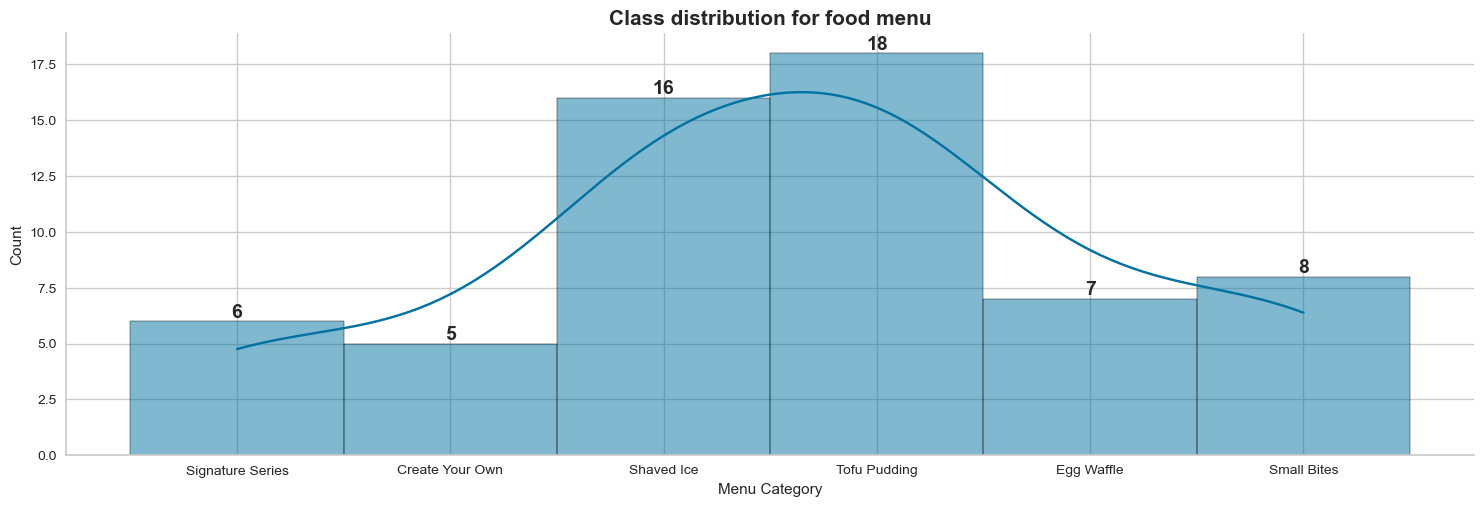

In [450]:
title = "Class distribution for food menu"
plot_dist(df_menu_food["Menu Category"], title)

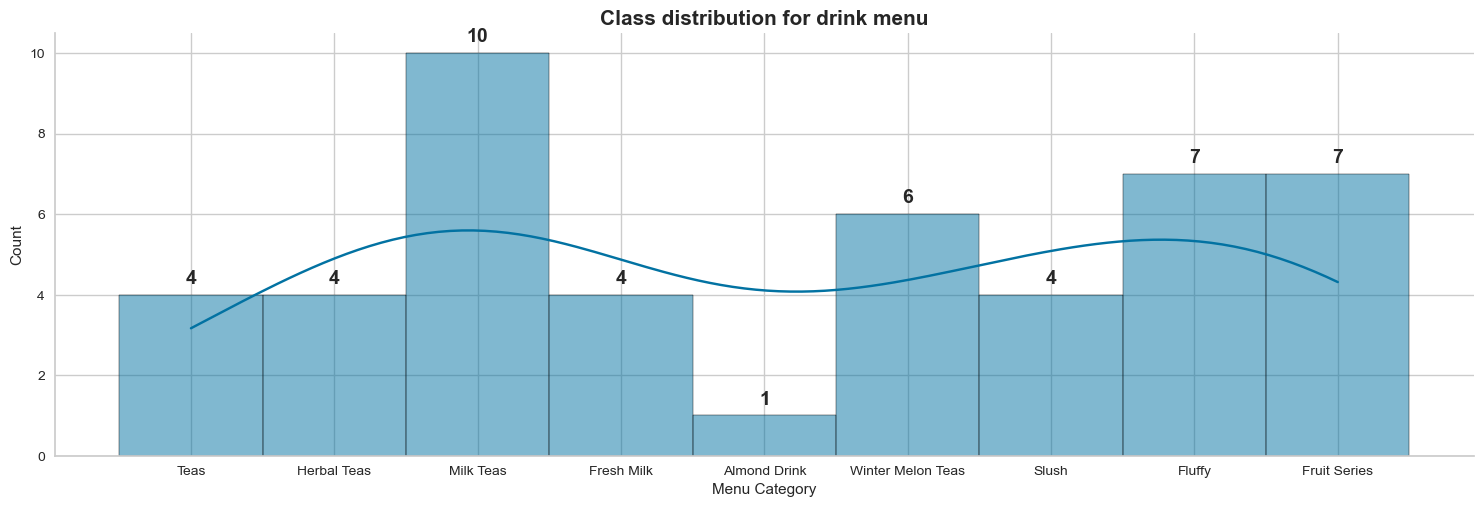

In [451]:
title = "Class distribution for drink menu"
plot_dist(df_menu_drink["Menu Category"], title)

## Image Distribution

In [452]:
# org_dir = ROOT_DIR + "/cv2"
org_files = os.listdir(RAW_PIXEL_DIR)

unique_list = list()

for item in org_files:
    temp_df = df_menu_drink.loc[(df_menu_drink["Item Name (ENG)"] == item.split(".")[0])]
    
    if len(temp_df["Menu Category"].values) > 0:
        unique_list.append(temp_df["Menu Category"].values[0])

    
# distri_listing = dict((x,unique_list.count(x)) for x in set(unique_list))

In [453]:
df_cv = pd.DataFrame(data={"prod": unique_list})

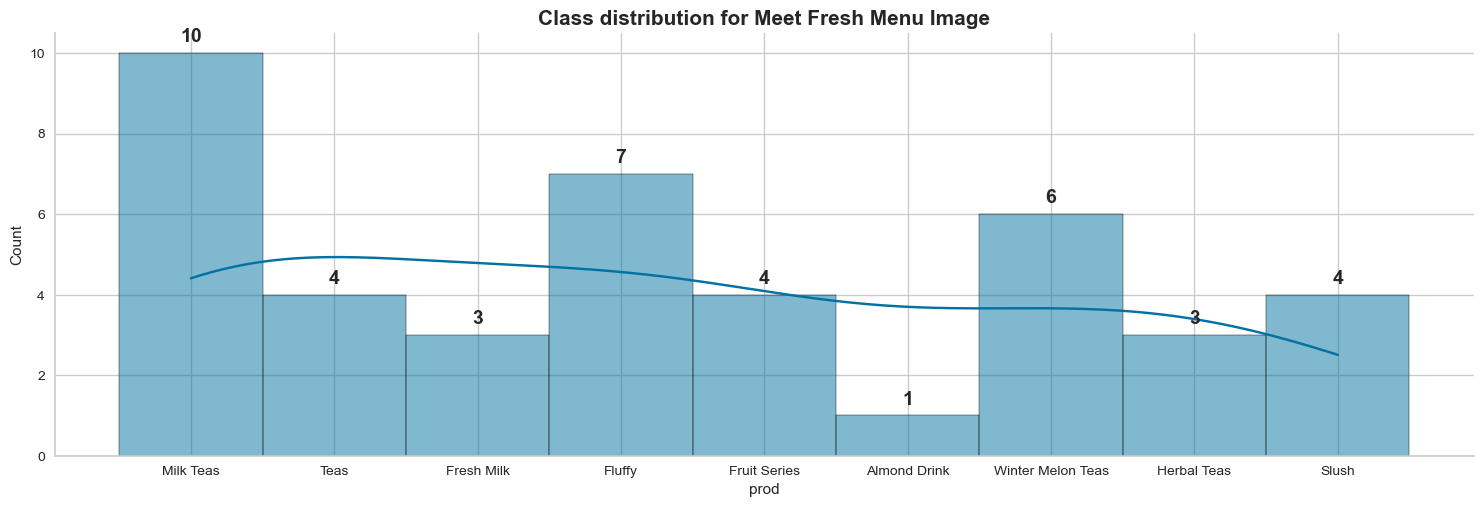

In [454]:
title = "Class distribution for Meet Fresh Menu Image"
plot_dist(df_cv["prod"], title)

In [455]:
def retrieve_stored_features(path: str, product_name: str):
    # retrieve a stored local descriptor based on given name
    try:
        file_path = path + "/" + product_name + ".txt"
        file = open(file_path, 'rb')
    `    descriptor = pickle.load(file)
        file.close()

        return descriptor

    except FileNotFoundError:
        print("Wrong file name or path for {}".format(product_name))
        return None
    except e:
        print("Error due to: {}".format(e))
        return None

SyntaxError: invalid syntax (2669413657.py, line 6)

In [495]:
files = os.listdir(RAW_PIXEL_DIR)

X2 = pd.DataFrame
x = list()
class_ = list()
counter = 0

for file in files:
    temp_df = df_menu_drink.loc[(
        df_menu_drink["Item Name (ENG)"] == file.split(".")[0])]

    if len(temp_df["Menu Category"].values) > 0:
        x.append(np.array(retrieve_stored_features(RAW_PIXEL_DIR, file.split(".")[0]), dtype=float).flatten())
#         X2.iloc[counter] = np.array(retrieve_stored_features(RAW_PIXEL_DIR, file.split(".")[0]), dtype=np.float64).flatten()
        
        class_.append(temp_df["Menu Category"].values[0])
        counter += 1

# x = np.array(x, dtype=float)
print(">>> All jobs done!")

>>> All jobs done!


In [496]:
X = pd.DataFrame()

In [506]:
x_ = list()

for item in x:
    temp = list()
    for i in item:
        temp.append(i)
    
    x_.append(temp)

x_

[[255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
  255.0,
 

In [507]:
X["features"] = x_
X["features"] = X["features"].astype(float)
X["class_"] = class_

X.info()

ValueError: setting an array element with a sequence.

In [498]:
X.sample(10)

,features,class_
4,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Teas
0,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Milk Teas
29,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Milk Teas
40,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Winter Melon Teas
26,"[253.0, 255.0, 252.0, 253.0, 255.0, 252.0, 254...",Fruit Series
15,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Slush
35,"[252.0, 255.0, 255.0, 252.0, 255.0, 255.0, 250...",Teas
36,"[255.0, 255.0, 253.0, 255.0, 255.0, 253.0, 255...",Milk Teas
11,"[255.0, 254.0, 255.0, 255.0, 254.0, 255.0, 255...",Fluffy
19,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",Fluffy


In [499]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [500]:
ct = ColumnTransformer(
    transformers=[('encoder', OrdinalEncoder(), [-1])], remainder='passthrough')

In [501]:
X["class_"] = ct.fit_transform(X)

In [502]:
X.sample(10)

,features,class_
34,"[255.0, 254.0, 255.0, 255.0, 254.0, 255.0, 255...",1.0
36,"[255.0, 255.0, 253.0, 255.0, 255.0, 253.0, 255...",5.0
13,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",3.0
20,"[255.0, 255.0, 253.0, 255.0, 255.0, 253.0, 255...",8.0
6,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",5.0
17,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",6.0
8,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",1.0
22,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...",6.0
33,"[255.0, 255.0, 253.0, 255.0, 255.0, 253.0, 255...",5.0
18,"[255.0, 255.0, 253.0, 255.0, 255.0, 253.0, 255...",3.0


In [503]:
len(X.index)

42

In [504]:
X["features"] = X["features"].astype(float)
X["class_"] = X["class_"].astype('int32')
X.info()

ValueError: setting an array element with a sequence.

In [372]:
X.sample(10)

,features,class_
21,254.0,4
15,255.0,6
8,255.0,1
4,255.0,7
11,255.0,1
20,255.0,8
40,255.0,8
24,255.0,2
34,255.0,1
2,255.0,5


# Model Selection: classification

In [345]:
from pycaret.classification import *

In [419]:
exp_mclf101 = setup(data=X, target="class_", session_id=123, log_experiment=True, experiment_name='g5_eda1')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:11:30
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


TypeError: Cannot compare types 'ndarray(dtype=object)' and 'float'

In [347]:
best_model = compare_models(include = ['lr','knn','nb','lda','svm','rf'], fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3133,0.0000,0.2033,0.1042,0.1552,0.0000,0.0000,0.5640
lda,Linear Discriminant Analysis,0.2800,0.0000,0.1633,0.1111,0.1565,0.0246,0.0383,0.0060
rf,Random Forest Classifier,0.2800,0.0000,0.1733,0.1167,0.1629,0.0216,0.0336,0.0660
knn,K Neighbors Classifier,0.1000,0.0000,0.1200,0.0217,0.0356,-0.0057,-0.0115,0.3320
svm,SVM - Linear Kernel,0.1000,0.0000,0.0733,0.0278,0.0429,0.0000,0.0000,0.0060
nb,Naive Bayes,0.0667,0.0000,0.0500,0.0233,0.0333,-0.0978,-0.1620,0.2280


# Over-sampling: SMOTE

In [348]:
from imblearn.over_sampling import SMOTE

In [349]:
sm = SMOTE(random_state=42)

In [359]:
X

,features,class_
0,255.0,5
1,254.0,7
2,255.0,5
3,253.0,2
4,255.0,7
5,255.0,1
6,255.0,5
7,255.0,3
8,255.0,1
9,255.0,0


In [357]:
X_res = pd.DataFrame()

x_temp = X["features"]
# .features.apply(pd.Series)

x_temp

0     255.0
1     254.0
2     255.0
3     253.0
4     255.0
5     255.0
6     255.0
7     255.0
8     255.0
9     255.0
10    255.0
11    255.0
12    255.0
13    255.0
14    255.0
15    255.0
16    254.0
17    255.0
18    255.0
19    255.0
20    255.0
21    254.0
22    255.0
23    255.0
24    255.0
25    254.0
26    253.0
27    255.0
28    254.0
29    255.0
30    254.0
31    255.0
32    255.0
33    255.0
34    255.0
35    252.0
36    255.0
37    255.0
38    255.0
39    254.0
40    255.0
41    255.0
Name: features, dtype: float64

In [270]:
X_res["features"], X_res["class_"] = sm.fit_resample(X["features"].values.reshape(-1,1), X["class_"])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6